In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
plt.rcParams["figure.figsize"] = (15, 5)

In [3]:
weather = pd.concat([pd.read_csv(f'../data/weather_202{x}.csv', index_col=0) for x in range(3)]).reset_index(drop=True)
prices = pd.concat([pd.read_csv(f'../data/futures_202{x}.csv', index_col=0) for x in range(3)]).reset_index(drop=True)

In [25]:
# prices['diff1'] = prices['SBL'].diff()
# tmp = prices['diff1'].dropna()
weather['diff1'] = weather['weather'].diff()
tmp = prices['diff1'].dropna()

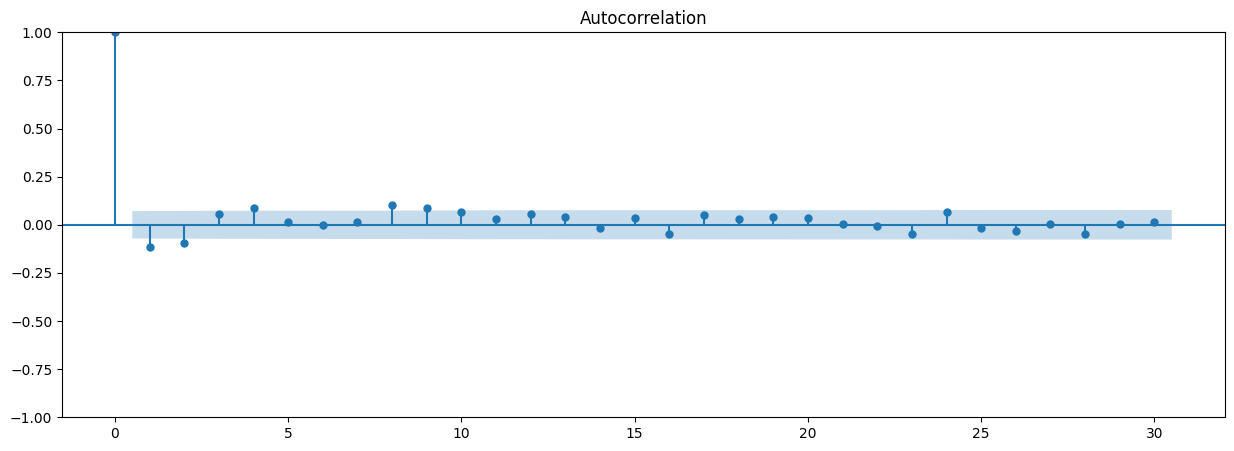

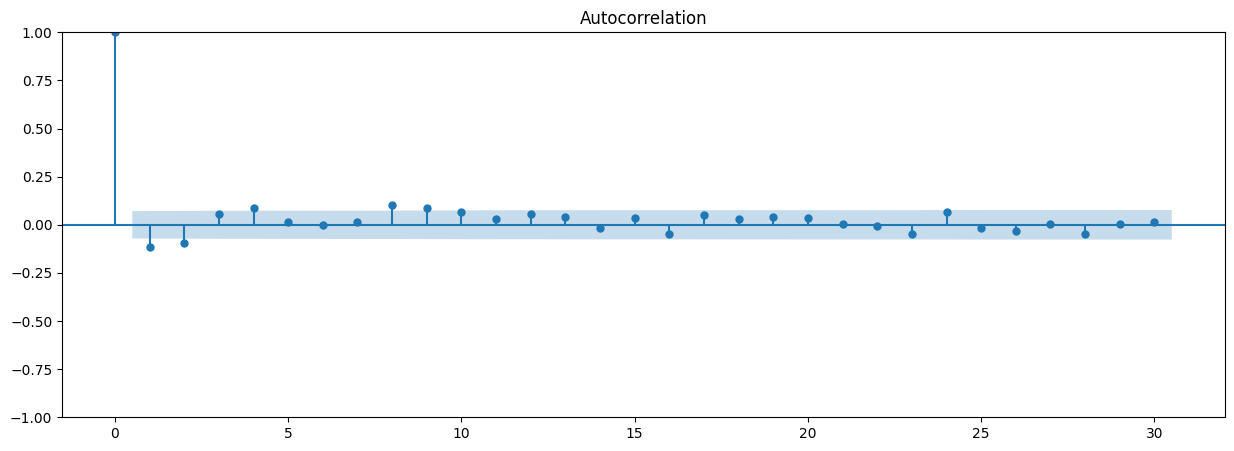

In [26]:
plot_acf(tmp, lags=30)

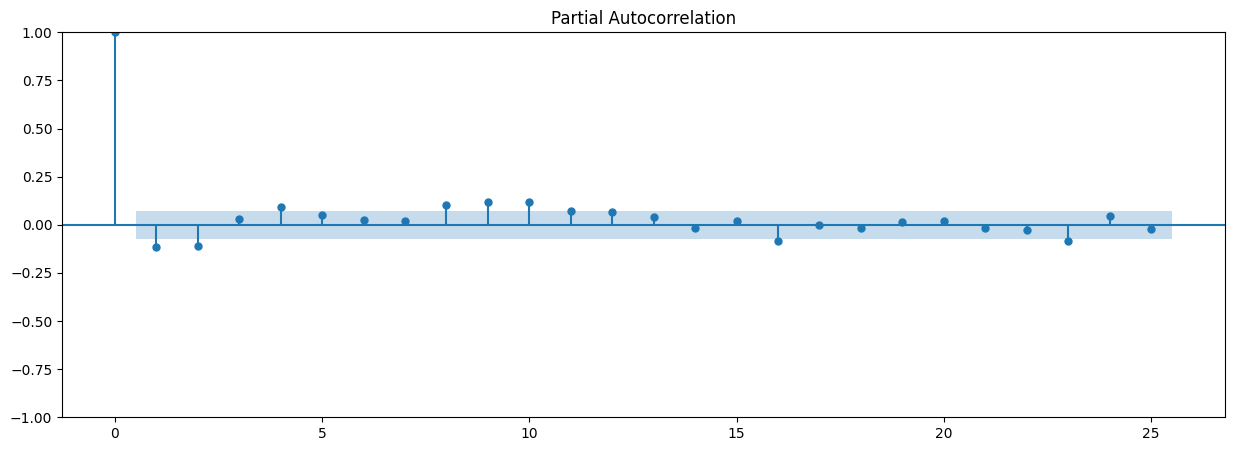

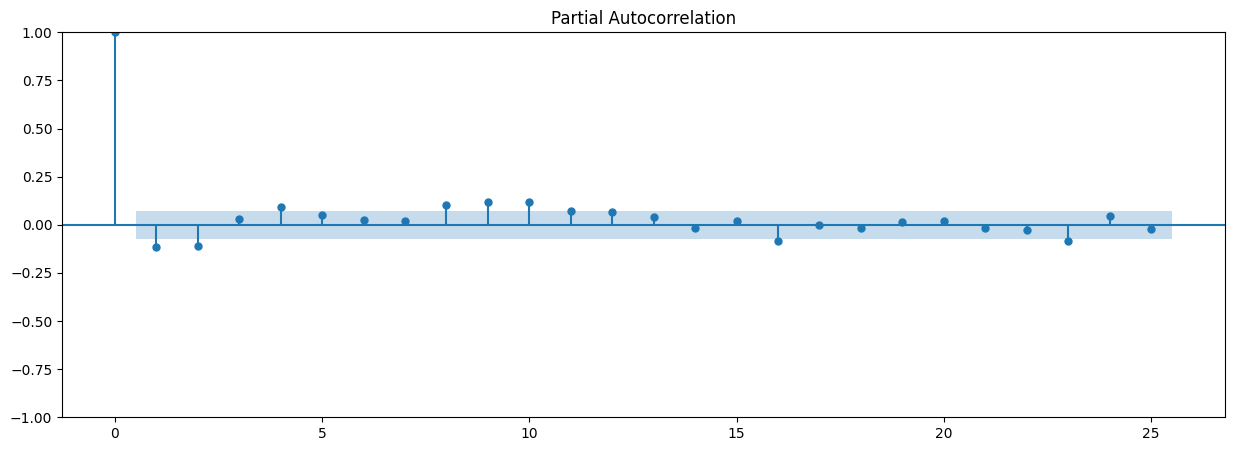

In [27]:
plot_pacf(tmp, lags=25)

In [23]:
sbl = prices[['SBL']]
sbl = sbl.rename(columns={'SBL': 'y'})
sbl['unique_id'] = 0
sbl['ds'] = sbl.index
sbl['weather'] = weather['weather']

In [5]:
seasonality = np.loadtxt('seasonality_case1.npy', dtype=float)
seasonality

array([ 0.094446, -0.037106,  0.186211, -0.309563,  0.17954 ,  0.269836,
        0.159928,  0.453416,  0.674616,  0.727061,  1.029189,  1.210214,
        0.984335,  1.400675,  1.426352,  1.74153 ,  1.674739,  1.317118,
        2.08433 ,  1.904939,  2.450729,  2.610913,  2.64929 ,  3.483385,
        3.320944,  3.417043,  3.180311,  2.993789,  2.724089,  3.471848,
        2.977022,  3.090209,  3.194748,  3.441501,  3.480819,  3.398196,
        3.09884 ,  2.892436,  3.490021,  3.934037,  4.420375,  3.881324,
        3.966157,  4.262953,  4.2066  ,  3.853834,  4.087812,  3.778582,
        3.056729,  2.626127,  3.309694,  3.732642,  3.214371,  3.479952,
        2.89935 ,  2.237191,  2.413076,  2.681887,  2.444614,  2.570025,
        2.870022,  2.620316,  2.421969,  2.631891,  2.768401,  2.98782 ,
        3.360607,  3.108094,  3.073435,  4.015763,  4.059766,  3.711763,
        3.0119  ,  2.627762,  2.94009 ,  3.355978,  3.649592,  2.898991,
        2.68336 ,  2.562644,  2.338906,  1.845192, 

In [ ]:
s = sbl['y'].to_numpy()

In [ ]:
sbl_decomp = np.concatenate((s[:252] - seasonality, s[252:504] - seasonality, s[504:756] - seasonality))
sbl_decomp.shape

In [ ]:
plt.plot(sbl_decomp)
plt.plot(sbl['y'])

In [ ]:
end = 600
arima = ARIMA(order=(2, 1, 3))
y_train = sbl_decomp[300:end]
x = weather['weather'].to_numpy().reshape(-1, 1)
x_train = x[300:end]

In [ ]:
arima = arima.fit(y=y_train, X=x_train)

In [ ]:
horizon = 1
y_hat_dict = arima.predict(X=x[end:end+horizon], h=horizon, level=[80])
y_hat_dict

In [ ]:
pred = []

for i in range(end, len(sbl_decomp)):
    arima = arima.fit(y=sbl_decomp[0:i], X=x[0:i])
    pred.append(arima.predict(h=horizon, X=x[i:i + horizon], level=[95])['mean'][0])

In [ ]:
# plt.plot(range(end, len(sbl_decomp)), np.array(pred) + seasonality[end % 252:], label='pred')
plt.plot(range(end, len(sbl_decomp)), np.array(pred), label='pred')
plt.plot(sbl_decomp, label='decomp')
plt.plot(sbl['y'], label='orig')
plt.legend(loc='upper right')
plt.xlim(left=600, right=700)

In [ ]:
import sklearn.metrics as skm

In [ ]:
skm.mean_squared_error(sbl['y'].to_numpy()[end+1:], (np.array(pred) + seasonality[end % 252:])[:-1])